<a href="https://colab.research.google.com/github/eldor-fozilov/data-science-contest/blob/main/Task_1/Task_1_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
path = "/content/drive/MyDrive/Colab Notebooks/College/data-science comp/"

In [7]:
!python models.py

Number of small business owners:  47085
Number of Non-small business owners:  672914


In [9]:
import models
from models import train, test_data, NeuralNet

NeuralNetCls = NeuralNet(train[0], test_data)

ImportError: ignored

In [11]:
!vim models.py

7="models.py" [noeol][dos] 175L, 6189C▽  [>c]10;?]11;?import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_repport
import numpy as np
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

path = "/content/drive/MyDrive/Colab Notebooks/College/data-science comp/"

# Read the data
train_data = pd.read_pickle(path + "train_task1.pkl")
test_data = pd.read_pickle(path + "test_task1.pkl")

train = []

label1 = train_data[train_data['label'] == 1] # small business owner
label0 = train_data[train_data['label'] == 0] # Non-small business owner1,1Top>8Vim: Caught deadly signal TERM

Vim: Finished.
^C


In [13]:
train[0][train[0]["label"] == 0].shape

(47085, 137)

In [14]:
train[0][train[0]["label"] == 1].shape

(47085, 137)

In [16]:
test_data[test_data["label"] == 1].shape

(5232, 137)

In [17]:
test_data[test_data["label"] == 0].shape

(74769, 137)

In [37]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np
# from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Neural Network
def NeuralNet(train_data, test_data):
    # Split the data
    X_train = train_data.drop(['label'], axis=1)
    y_train = train_data['label']
    X_test = test_data.drop(['label'], axis=1)
    y_test = test_data['label']

    # Scale the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Create the model
    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Fit the model
    model.fit(X_train, y_train, epochs=100, batch_size=256)

    # Predict the test data
    y_pred = model.predict(X_test)
    y_pred = np.where(y_pred_ > 0.5, 1, 0)
    # Print the results
    print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("Classification Report: ", classification_report(y_test, y_pred))

    return model

In [21]:
NeuralNetCls = NeuralNet(train[0], test_data)

Epoch 1/100
368/368 [==============================] - 4s 4ms/step - loss: 0.4898 - accuracy: 0.7619
Epoch 2/100
368/368 [==============================] - 1s 4ms/step - loss: 0.4505 - accuracy: 0.7883
Epoch 3/100
368/368 [==============================] - 1s 4ms/step - loss: 0.4326 - accuracy: 0.7980
Epoch 4/100
368/368 [==============================] - 1s 4ms/step - loss: 0.4238 - accuracy: 0.8017
Epoch 5/100
368/368 [==============================] - 1s 4ms/step - loss: 0.4167 - accuracy: 0.8046
Epoch 6/100
368/368 [==============================] - 1s 4ms/step - loss: 0.4116 - accuracy: 0.8073
Epoch 7/100
368/368 [==============================] - 1s 4ms/step - loss: 0.4040 - accuracy: 0.8112
Epoch 8/100
368/368 [==============================] - 1s 4ms/step - loss: 0.3998 - accuracy: 0.8140
Epoch 9/100
368/368 [==============================] - 1s 3ms/step - loss: 0.3951 - accuracy: 0.8155
Epoch 10/100
368/368 [==============================] - 1s 4ms/step - loss: 0.3921 - accura

In [25]:
# Split the data
X_train = train[0].drop(['label'], axis=1)
y_train = train[0]['label']
X_test = test_data.drop(['label'], axis=1)
y_test = test_data['label']

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
y_pred_ = NeuralNetCls.predict(X_test)

2501/2501 [==============================] - 4s 2ms/step


In [35]:
y_pred = np.where(y_pred_ > 0.5, 1, 0)

In [36]:
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: ", classification_report(y_test, y_pred))

Confusion Matrix:  [[54107 20662]
 [ 1103  4129]]
Accuracy:  0.7279409007387407
Classification Report:                precision    recall  f1-score   support

           0       0.98      0.72      0.83     74769
           1       0.17      0.79      0.28      5232

    accuracy                           0.73     80001
   macro avg       0.57      0.76      0.55     80001
weighted avg       0.93      0.73      0.80     80001



In [38]:
NN_models = []

for training_data in train:
  NeuralNetCls = NeuralNet(training_data, test_data)
  NN_models.append(NeuralNetCls)

Epoch 1/100
368/368 [==============================] - 2s 4ms/step - loss: 0.4920 - accuracy: 0.7609
Epoch 2/100
368/368 [==============================] - 1s 4ms/step - loss: 0.4483 - accuracy: 0.7891
Epoch 3/100
368/368 [==============================] - 1s 4ms/step - loss: 0.4323 - accuracy: 0.7978
Epoch 4/100
368/368 [==============================] - 1s 4ms/step - loss: 0.4238 - accuracy: 0.8016
Epoch 5/100
368/368 [==============================] - 1s 4ms/step - loss: 0.4153 - accuracy: 0.8053
Epoch 6/100
368/368 [==============================] - 1s 4ms/step - loss: 0.4085 - accuracy: 0.8078
Epoch 7/100
368/368 [==============================] - 1s 4ms/step - loss: 0.4030 - accuracy: 0.8110
Epoch 8/100
368/368 [==============================] - 1s 4ms/step - loss: 0.3987 - accuracy: 0.8136
Epoch 9/100
368/368 [==============================] - 1s 4ms/step - loss: 0.3932 - accuracy: 0.8159
Epoch 10/100
368/368 [==============================] - 1s 4ms/step - loss: 0.3911 - accura

In [56]:
from sklearn.utils import shuffle
def predictions(train_data, test_data, models, threshold):
  train_data = shuffle(train_data)
  X_train = train_data.drop(['label'], axis=1)
  y_train = train_data['label']
  X_test = test_data.drop(['label'], axis=1)
  y_test = test_data['label']

  # Scale the data
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  prediction_list = []

  for model in models:
    y_pred = model.predict(X_test)
    prediction_list.append(y_pred)

  prediction = np.mean(prediction_list, axis = 0)
  y_pred = np.where(y_pred >= threshold, 1, 0)

  # Print the results
  print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
  tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
  print("True Positive: ", tp)
  print("True Negetive: ", tn)
  print("False Positive: ", fp)
  print("False Negative: ", fn)
  print("Accuracy: ", accuracy_score(y_test, y_pred))
  print("Classification Report: ", classification_report(y_test, y_pred))
  return y_test, prediction


In [57]:
y_test, pred = predictions(train[0], test_data, NN_models, 0.85)
pred.shape

2501/2501 [==============================] - 4s 2ms/step
Confusion Matrix:  [[64896  9873]
 [ 2586  2646]]
True Positive:  2646
True Negetive:  64896
False Positive:  9873
False Negative:  2586
Accuracy:  0.8442644466944164
Classification Report:                precision    recall  f1-score   support

           0       0.96      0.87      0.91     74769
           1       0.21      0.51      0.30      5232

    accuracy                           0.84     80001
   macro avg       0.59      0.69      0.61     80001
weighted avg       0.91      0.84      0.87     80001



(80001, 1)

In [64]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)

In [63]:
metrics.roc_auc_score(y_test, pred)

0.875615453190117

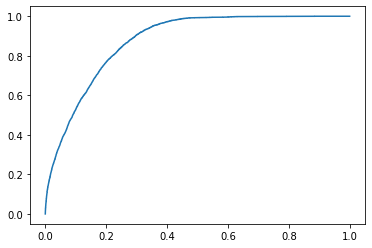

In [66]:
import matplotlib.pyplot as plt
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Neural Network, AUC="+str(auc))